<a href="https://colab.research.google.com/github/kgazaleh/thwnd_2000-IDS/blob/main/problem1_r_ipynp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Use the following dataset about adults: https://github.com/bforoura/IDS/blob/main/HW4/adult_training.csv

Create a contingency table of workclass and sex, and plot it.

In [ ]:
# Start rmagic to mix Python and R code sells
%load_ext rpy2.ipython

In [ ]:
#import data from github

%%R

library(readr)
adult_trainingDF <- read_csv("https://raw.githubusercontent.com/kgazaleh/thwnd_2000-IDS/main/HW4/adult_training.csv", show_col_types = FALSE)

summary(adult_trainingDF)

      age         workclass           education     marital-status    
 Min.   :17.00   Length:14797       Min.   : 1.00   Length:14797      
 1st Qu.:28.00   Class :character   1st Qu.: 9.00   Class :character  
 Median :37.00   Mode  :character   Median :10.00   Mode  :character  
 Mean   :38.69                      Mean   :10.07                     
 3rd Qu.:48.00                      3rd Qu.:12.00                     
 Max.   :90.00                      Max.   :16.00                     
  occupation            sex             capital-gain    capital-loss    
 Length:14797       Length:14797       Min.   :    0   Min.   :   0.00  
 Class :character   Class :character   1st Qu.:    0   1st Qu.:   0.00  
 Mode  :character   Mode  :character   Median :    0   Median :   0.00  
                                       Mean   : 1067   Mean   :  88.58  
                                       3rd Qu.:    0   3rd Qu.:   0.00  
                                       Max.   :99999   Max.   :43

In [ ]:
# Cross tabulation of workclass and sex

%%R


r_crosstab <- table(adult_trainingDF$workclass, adult_trainingDF$sex)

ftable(r_crosstab)

                  Female Male
                             
?                    377  452
Federal-gov          149  305
Local-gov            377  592
Never-worked           1    4
Private             3574 6707
Self-emp-inc          54  444
Self-emp-not-inc     178  992
State-gov            201  385
Without-pay            1    4


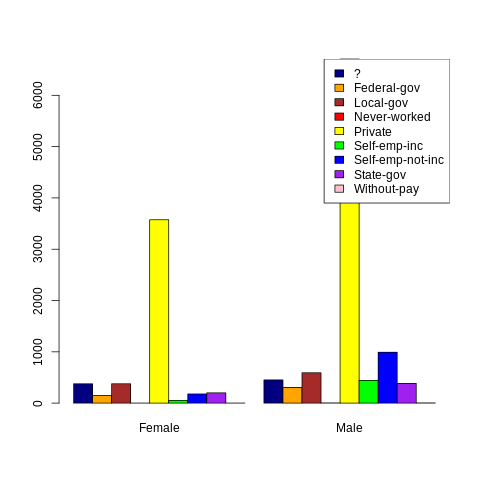

In [ ]:
#create barplot

%%R

colors <- c("navy", "orange", "brown", "red", "yellow", "green", "blue", "purple", "pink")

barplot(r_crosstab, col = colors, beside = TRUE)
legend("topright", legend = c("?", "Federal-gov", "Local-gov", "Never-worked", "Private", "Self-emp-inc", "Self-emp-not-inc", "State-gov", "Without-pay"), fill = colors)

In [ ]:
#change name of marital column

%%R

names(adult_trainingDF)[4] <- "marital"

In [ ]:
# Cross tabulation of sex and marital status

%%R

r_crosstab <- table(adult_trainingDF$sex, adult_trainingDF$marital)

ftable(r_crosstab)


        Divorced Married-AF-spouse Married-civ-spouse Married-spouse-absent Never-married Separated Widowed
                                                                                                           
Female      1219                 7                761                    95          2160       290     380
Male         795                 4               6010                   104          2717       182      73


Create a new data frame, adultOver40, for those whose age > 40.


In [ ]:
#Create new data frame
%%R

adultOver40 <- adult_trainingDF[(adult_trainingDF$age > 40),]

summary(adultOver40)

      age         workclass           education       marital         
 Min.   :41.00   Length:6144        Min.   : 1.00   Length:6144       
 1st Qu.:45.00   Class :character   1st Qu.: 9.00   Class :character  
 Median :50.00   Mode  :character   Median :10.00   Mode  :character  
 Mean   :52.08                      Mean   :10.15                     
 3rd Qu.:57.00                      3rd Qu.:13.00                     
 Max.   :90.00                      Max.   :16.00                     
  occupation            sex             capital-gain    capital-loss   
 Length:6144        Length:6144        Min.   :    0   Min.   :   0.0  
 Class :character   Class :character   1st Qu.:    0   1st Qu.:   0.0  
 Mode  :character   Mode  :character   Median :    0   Median :   0.0  
                                       Mean   : 1598   Mean   : 115.3  
                                       3rd Qu.:    0   3rd Qu.:   0.0  
                                       Max.   :99999   Max.   :4356.0  

Recreate the contingency table of sex and marital status for adultOver40.


In [ ]:
#Recreation of contingency table for sex and marital status for new df
%%R

r_crosstab <- table(adultOver40$sex, adultOver40$marital)

ftable(r_crosstab)

        Divorced Married-civ-spouse Married-spouse-absent Never-married Separated Widowed
                                                                                         
Female       720                305                    38           256       133     354
Male         448               3383                    47           315        74      71


Determine whether any outliers exist for the education field. 


In [ ]:
# scale education

%%R

adult_trainingDF$scaled_education <- scale(x = adult_trainingDF$education)

summary(adult_trainingDF$scaled_education)

       V1          
 Min.   :-3.49029  
 1st Qu.:-0.41135  
 Median :-0.02648  
 Mean   : 0.00000  
 3rd Qu.: 0.74326  
 Max.   : 2.28273  


In [ ]:
# Determine the three sigma rule first for the scaled_education attribute
%%R

three_sigma_rule <- (adult_trainingDF$scaled_education < -3 | 
                     adult_trainingDF$scaled_education > 3 )


# how many outliers are there?
cat ("There are", sum(three_sigma_rule), "outliers \n\n")


There are 113 outliers 



Standardize (zero mean) the age variable, and identify how many outliers there are. What is the most extreme outlier?


In [ ]:
# need to find most extreme outlier

# scale age

%%R

adult_trainingDF$scaled_age <- scale(x = adult_trainingDF$age)

summary(adult_trainingDF$scaled_age)

# Determine the three sigma rule first for the scaled_age attribute

three_sigma_rule <- (adult_trainingDF$scaled_age < -3 | 
                     adult_trainingDF$scaled_age > 3 )

# how many outliers are there?
cat ("There are", sum(three_sigma_rule), "outliers \n\n")

cat("The scaled age values that are outliers: \n\n")
adult_trainingDF$scaled_age[which(three_sigma_rule)]

There are 60 outliers 

The scaled age values that are outliers: 

 [1] 3.751227 3.020173 3.751227 3.605016 3.751227 3.751227 3.166384 3.751227
 [9] 3.020173 3.751227 3.751227 3.239489 3.385700 3.166384 3.020173 3.751227
[17] 3.020173 3.751227 3.312594 3.751227 3.751227 3.312594 3.020173 3.751227
[25] 3.312594 3.751227 3.093278 3.020173 3.020173 3.751227 3.020173 3.751227
[33] 3.239489 3.166384 3.751227 3.751227 3.166384 3.385700 3.093278 3.093278
[41] 3.751227 3.166384 3.605016 3.312594 3.458805 3.751227 3.166384 3.093278
[49] 3.751227 3.020173 3.312594 3.751227 3.093278 3.751227 3.531911 3.020173
[57] 3.166384 3.751227 3.385700 3.166384


In [ ]:
%%R

summary(adult_trainingDF$scaled_age)

       V1         
 Min.   :-1.5855  
 1st Qu.:-0.7813  
 Median :-0.1234  
 Mean   : 0.0000  
 3rd Qu.: 0.6808  
 Max.   : 3.7512  


The most extreme outlier is 3.7512 (scaled).

Age anomaly? Select only records with age  at least 80, and construct a histogram of age. Explain what you see.


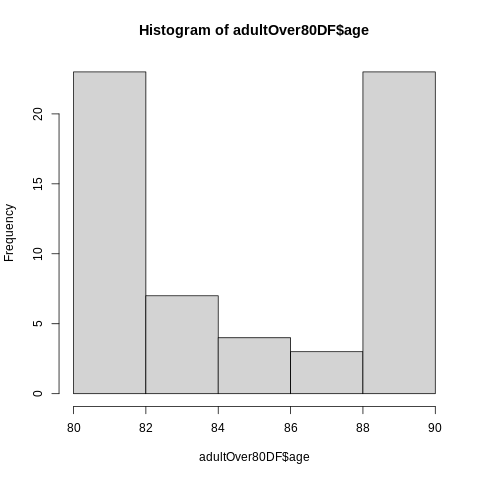

In [ ]:
#Select only records with age at least 80
%%R

adultOver80DF <- subset(adult_trainingDF, age >= 80)

#Contstruct a histogram of age
hist(adultOver80DF$age)

It appears that the majority of people 80 years and older are either close to 80 or 90 years old, with only a few individuals being in their mid-80s.

From the cross tabulation of workclass and sex, we found that the job status with the highest amount of individuals for both sexes was private. The marriage status for the highest number of males was married with a civil spouse and females was never married. This fact did not change when only looking at adults over 40 years old.